In [1]:
import pandas as pd
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="system",
    database="salesdb"
)

query = "select * from sales_data"
df = pd.read_sql(query, conn)

print(df.head())

C:\Users\Abuhumza\AppData\Local\Temp\ipykernel_9972\1095079056.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


         Order_ID  Order_Date   Sales  Profit         Category Region
0  CA-2016-152156  2016-08-11  261.96   41.91        Furniture  South
1  CA-2016-152156  2016-08-11  731.94  219.58        Furniture  South
2  CA-2016-138688  2016-12-06   14.62    6.87  Office Supplies   West
3  US-2015-108966  2015-11-10  957.58 -383.03        Furniture  South
4  US-2015-108966  2015-11-10   22.37    2.52  Office Supplies  South


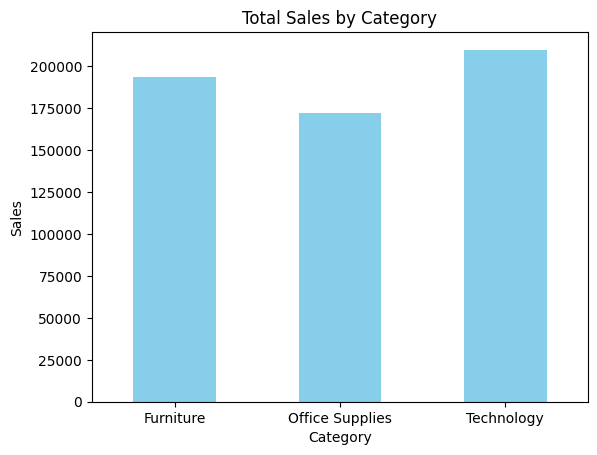

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: sales by category
category_sales = df.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.ylabel('Sales')
plt.show()

In [ ]:
summary = df.groupby(['Region', 'Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
summary.to_csv('sales_summary.csv', index=False)